In [1]:
import warnings
import ast
from pathlib import Path

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon

warnings.filterwarnings("ignore")

In [2]:
PROJECT_NAME = "activemq"
EXP_ID = "apch"
MODEL_HISTORY = 15
TOTAL_WINDOWS = 20
ALPHA = 0.05

DATA_DIR = Path().cwd() / "ecoselekt" / "data"
MODELS_DIR = Path().cwd() / "ecoselekt" / "models"
RESULTS_DIR = Path().cwd() / "results" / f"exp_{EXP_ID}"
FIGURES_DIR = Path().cwd() / "figures"

DATA_DIR.mkdir(parents=True, exist_ok=True)
MODELS_DIR.mkdir(parents=True, exist_ok=True)
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
# load baseline evaluation results
base_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_base_eval.csv")
base_eval_df["model"] = "base"
base_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,activemq,0,1,0.454545,0.227273,0.303030,0.753861,0.458029,0.490978,0.923077,base
1,activemq,0,2,0.416667,0.116279,0.181818,0.718338,0.333309,0.436855,0.955414,base
2,activemq,0,3,0.814815,0.354839,0.494382,0.793128,0.584792,0.687581,0.963768,base
3,activemq,0,4,0.550000,0.220000,0.314286,0.722333,0.454753,0.449496,0.940000,base
4,activemq,0,5,0.848485,0.329412,0.474576,0.767877,0.561328,0.733871,0.956522,base


In [4]:
# load ecoselekt evaluation results
selekt_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selekt_eval.csv")
selekt_eval_df["model"] = "ecoselekt"
selekt_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,activemq,15,16,0.516129,0.592593,0.551724,0.780315,0.686168,0.567038,0.794521,ecoselekt
1,activemq,15,17,0.387500,0.704545,0.500000,0.769886,0.695159,0.583460,0.685897,ecoselekt
2,activemq,15,18,0.305556,0.733333,0.431373,0.815392,0.719477,0.437276,0.705882,ecoselekt
3,activemq,15,19,0.216667,0.500000,0.302326,0.656388,0.604105,0.295644,0.729885,ecoselekt
4,activemq,15,20,0.214286,0.631579,0.320000,0.810846,0.691409,0.343125,0.756906,ecoselekt


In [5]:
# load best select evaluation results
best_eval_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_eval.csv")
best_eval_df["model"] = "best"
best_eval_df.head()

,project,window,test_split,precision,recall,f1,auc,gmean,ap,specifi,model
0,activemq,15,16,0.516129,0.592593,0.551724,0.780315,0.686168,0.567038,0.794521,best
1,activemq,15,17,0.387500,0.704545,0.500000,0.769886,0.695159,0.583460,0.685897,best
2,activemq,15,18,0.305556,0.733333,0.431373,0.815392,0.719477,0.437276,0.705882,best
3,activemq,15,19,0.216667,0.500000,0.302326,0.656388,0.604105,0.295644,0.729885,best
4,activemq,15,20,0.214286,0.631579,0.320000,0.810846,0.691409,0.343125,0.756906,best


(30, 11)


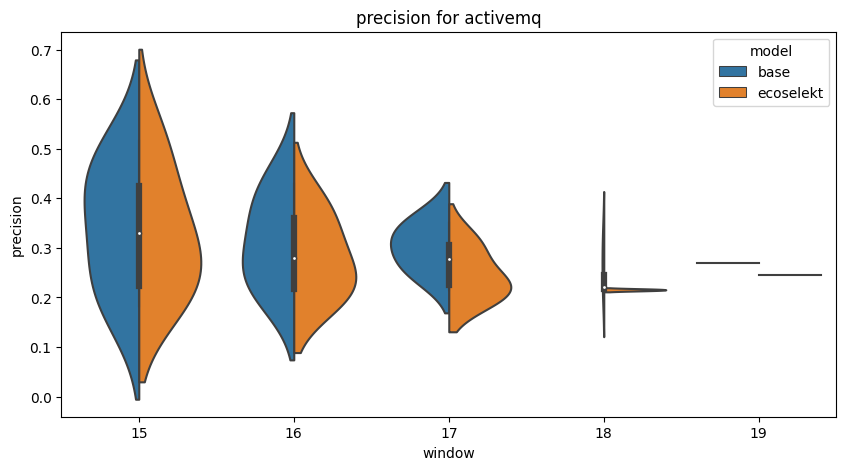

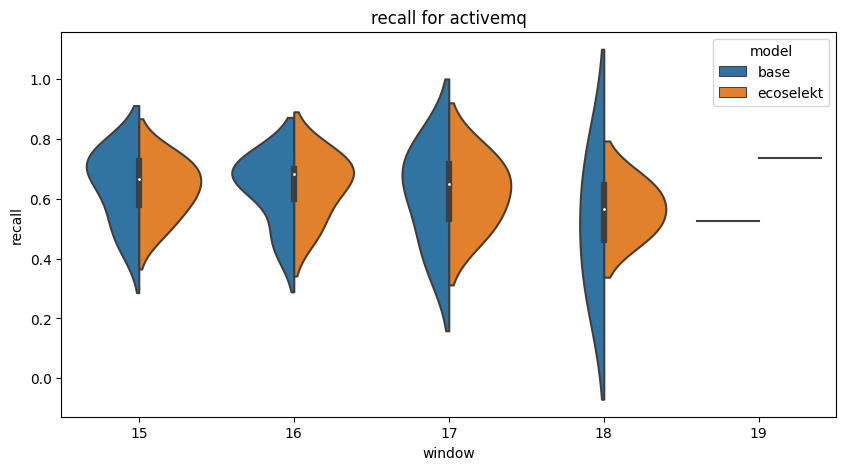

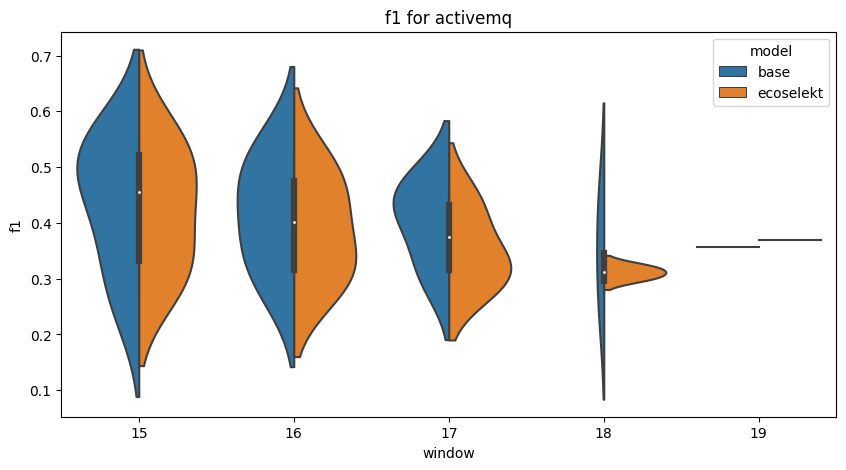

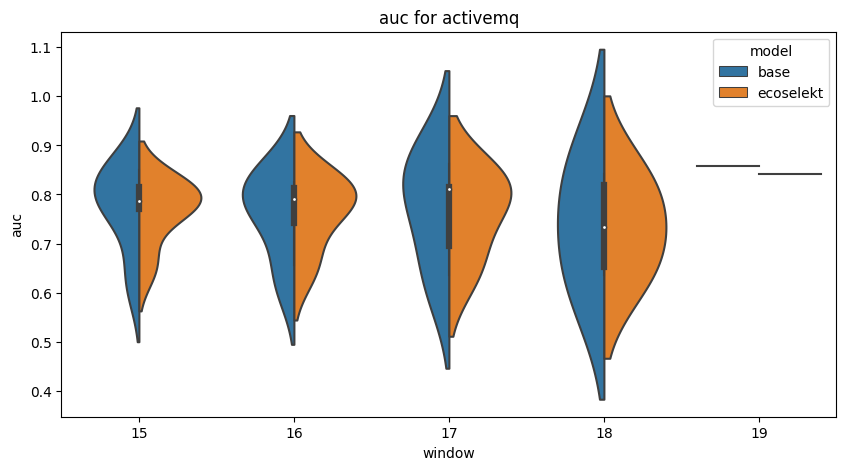

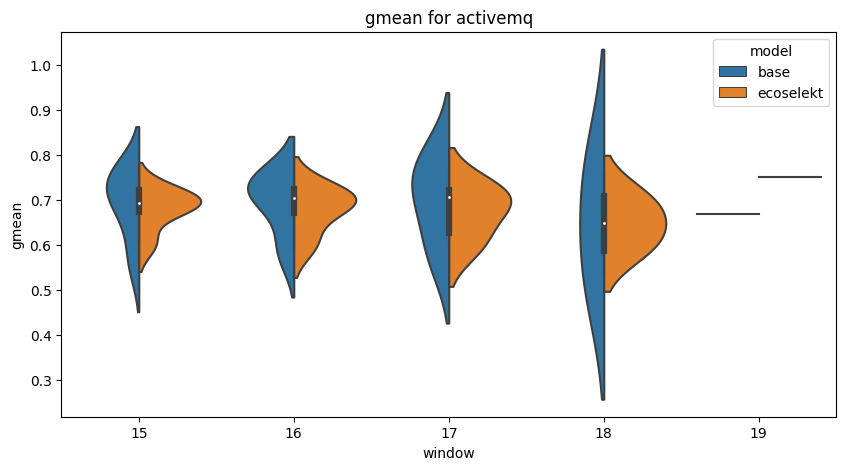

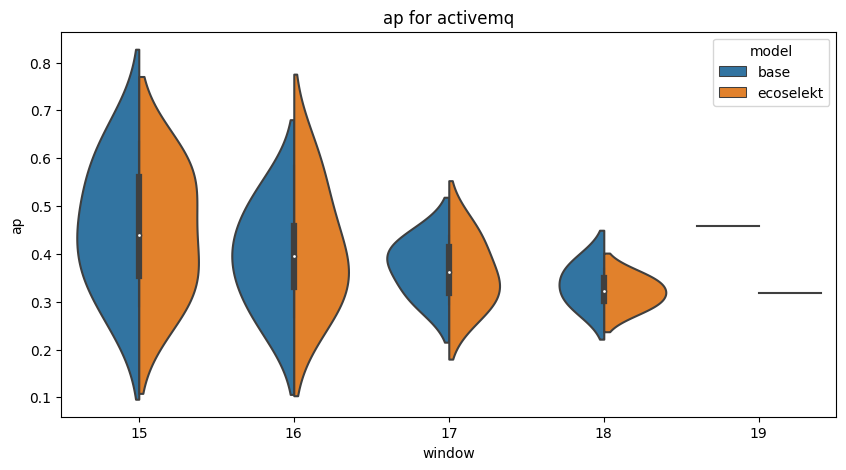

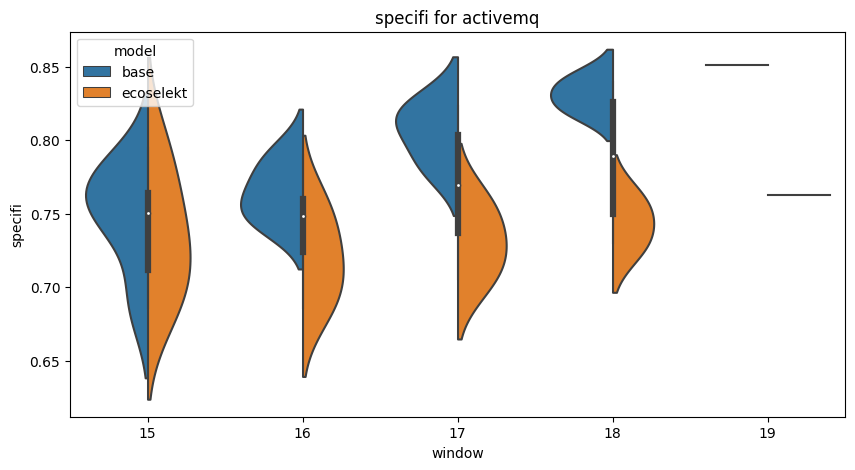

In [6]:
# concat base and ecoselekt evaluation dataframes keeping only common `window` and `test_split` then plot violin plots for each metric
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
print(eval_df.shape)

# plot violin plots for each metric
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x="window", y=metric, data=eval_df, hue="model", split=True)
    plt.title(f"{metric} for {PROJECT_NAME}")
    plt.show()


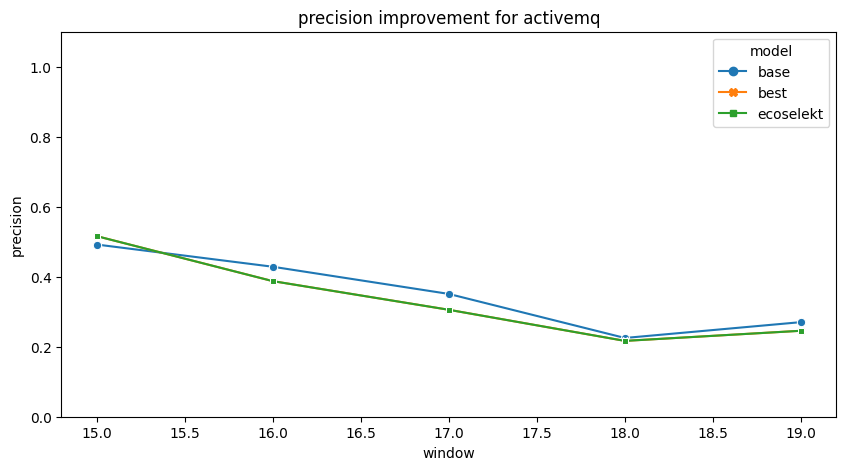

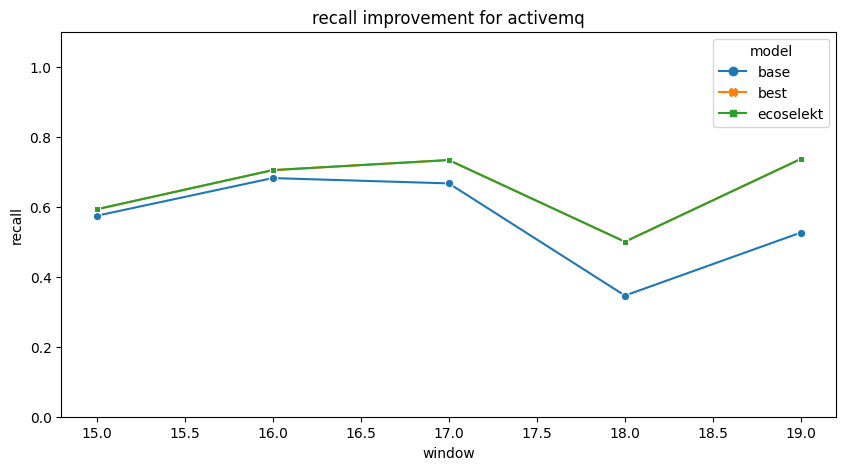

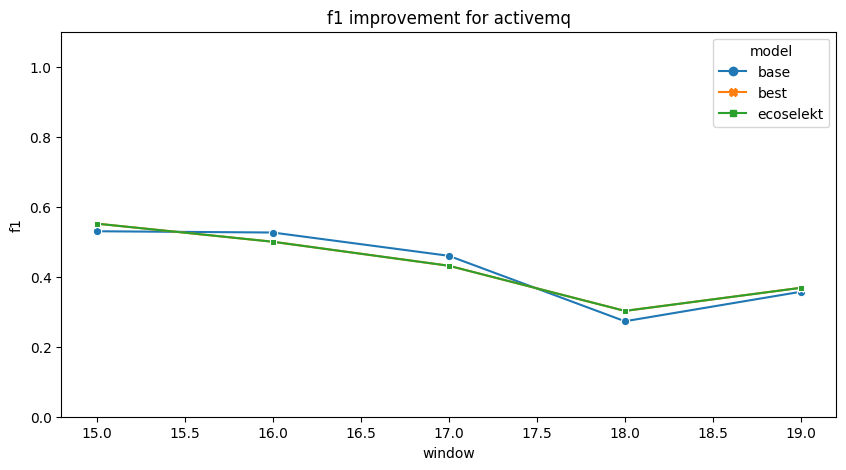

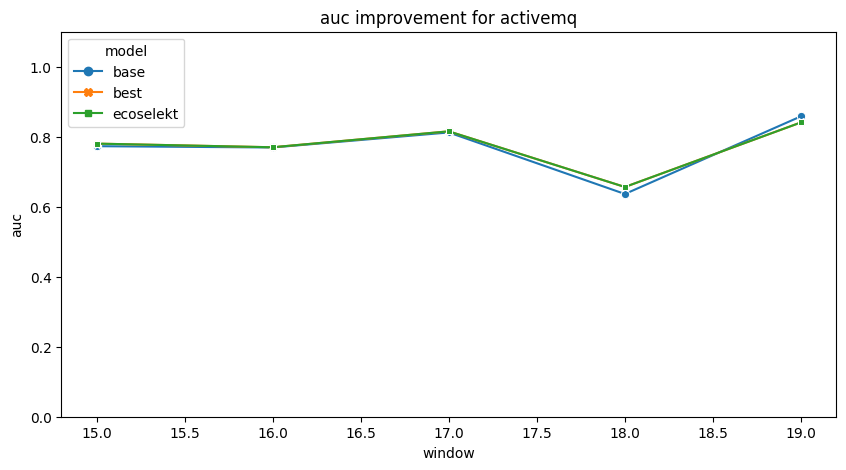

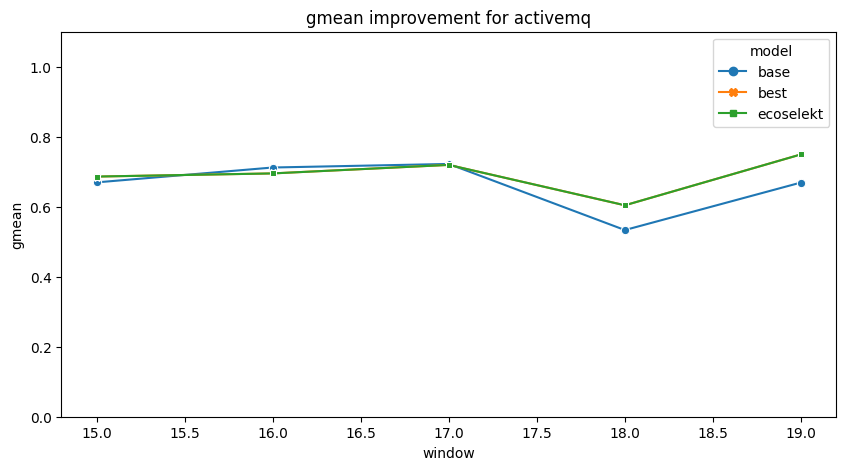

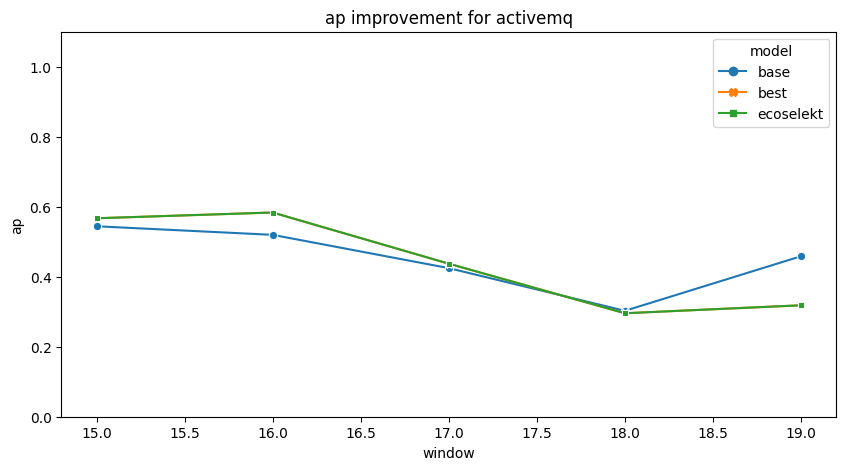

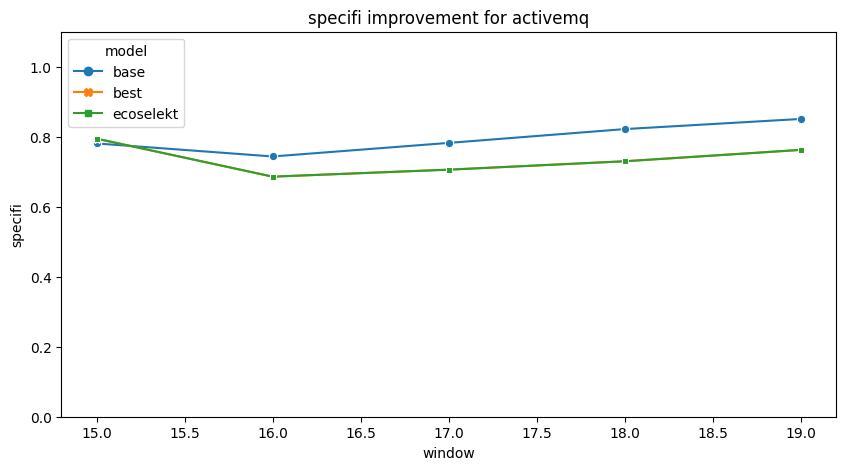

In [7]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

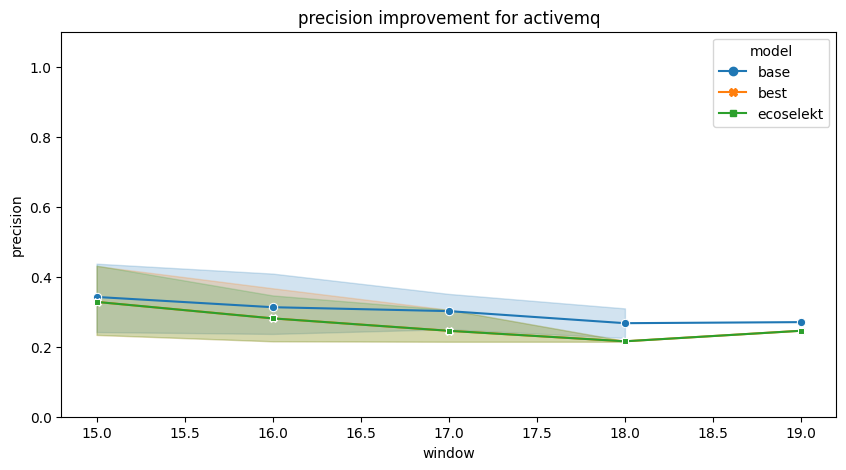

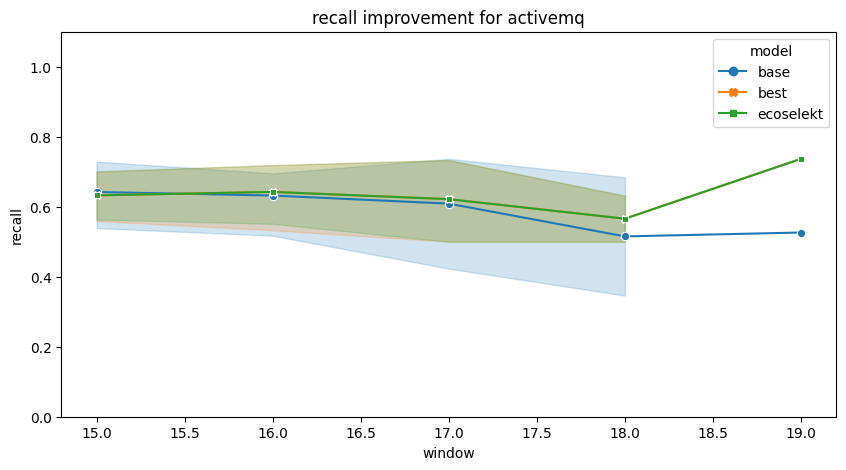

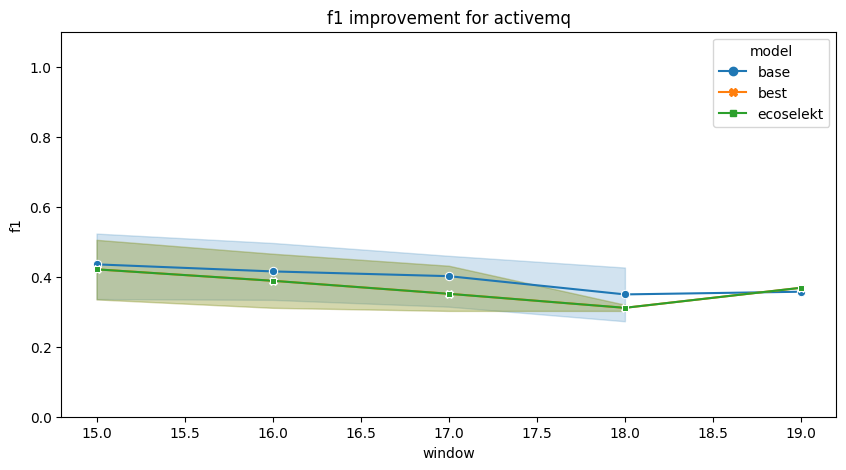

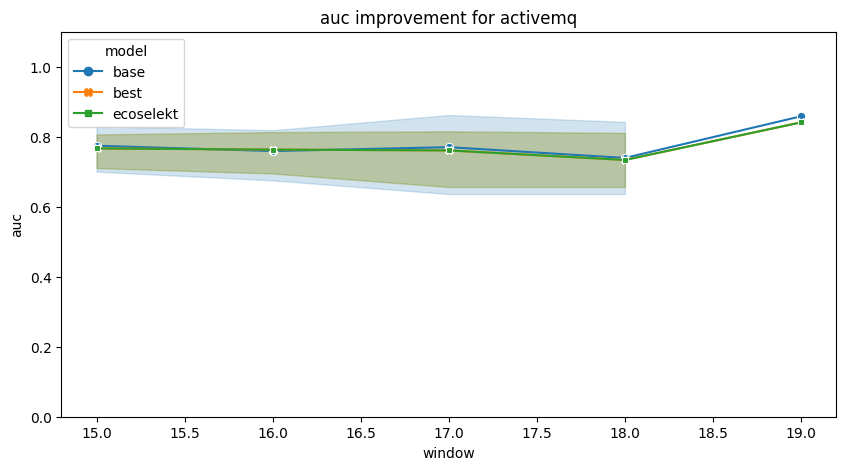

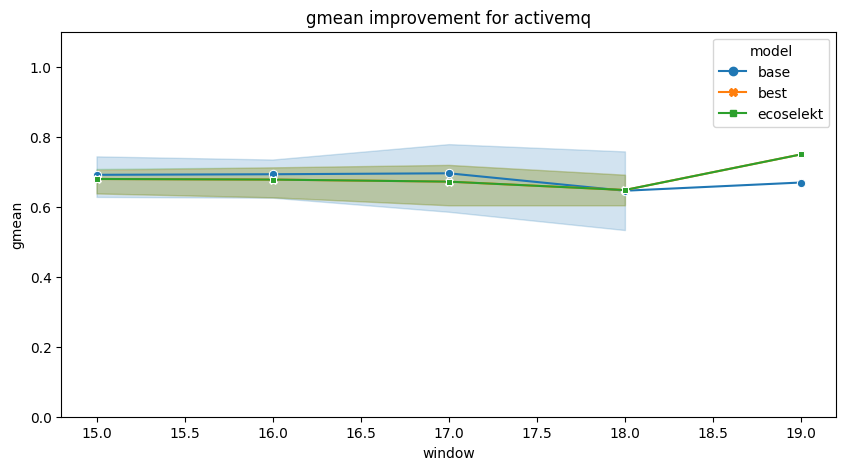

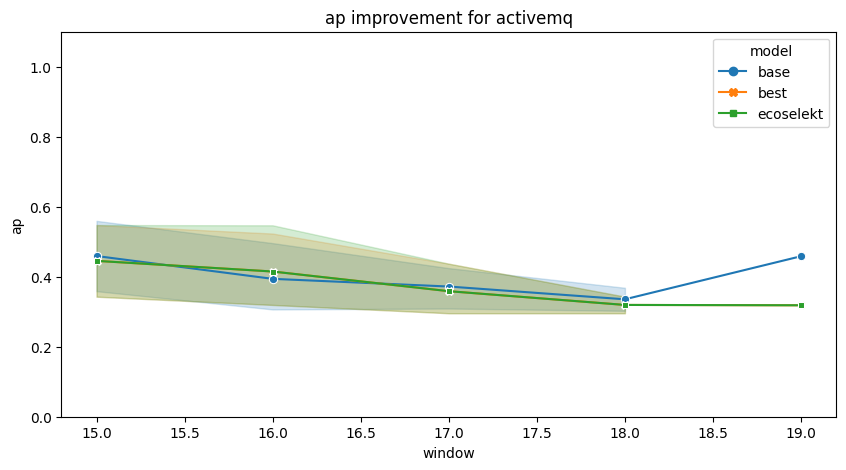

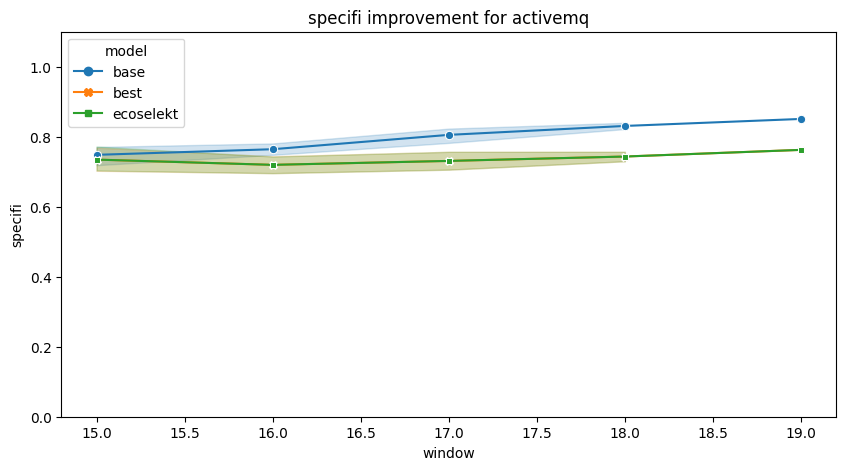

In [8]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], best_eval_df, selekt_eval_df])
# eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
# plot percetange improvement for each metric for each window
for metric in ["precision", "recall", "f1", "auc", "gmean", "ap", "specifi"]:
    plt.figure(figsize=(10, 5))
    sns.lineplot(x="window", y=metric, data=eval_df, hue="model", markers=True, style="model", dashes=False)
    plt.title(f"{metric} improvement for {PROJECT_NAME}")
    plt.ylim(0, 1.1)
    plt.show()

In [9]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["auc"], eval_df[eval_df["model"] == "base"]["auc"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.4375
Wilcoxon test significance: False


In [10]:
eval_df = pd.concat([base_eval_df[base_eval_df["window"] >= MODEL_HISTORY], selekt_eval_df])
eval_df = eval_df[eval_df["window"] == eval_df["test_split"] - 1]
_, p = wilcoxon(eval_df[eval_df["model"] == "ecoselekt"]["recall"], eval_df[eval_df["model"] == "base"]["recall"])
print(f"Wilcoxon test p-value: {p}")
print(f"Wilcoxon test significance: {p < ALPHA}")

Wilcoxon test p-value: 0.0625
Wilcoxon test significance: False


In [11]:
bestmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_best_model_per_test_split.csv")
bestmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(bestmodel_df.shape)
bestmodel_df.head()

(3000, 4)


,commit_id,window,test_split,model_version
0,2050498c6788a925efa24630803328286468c079,15,16,12
1,4c272e308130db6152ea29c46a16e5fb6e01e6ae,15,16,12
2,f00d2fbde4b4dca72a8fd961ef8d5895e1b80584,15,16,12
3,6c2e2f54461380a9e97792a2f4cd0a1e7bd86c96,15,16,12
4,51566104abd46722c73d71534e7576b5377d799c,15,16,12


In [12]:
selektmodel_df = pd.read_csv(RESULTS_DIR / f"{EXP_ID}_{PROJECT_NAME}_selected_model_per_test_split.csv")
selektmodel_df.drop(columns=["Unnamed: 0"], inplace=True)
print(selektmodel_df.shape)
selektmodel_df.head()

(11000, 4)


,commit_id,window,test_split,model_version
0,014773936022e72b4f8fdff90a0f9fdc33c9b247,15,16,9
1,02538ed9061b1a57c1a8b0c5accff76465429da0,15,16,15
2,02ef3dc91846b209dbcf9b65cced501bda2d8280,15,16,15
3,0484af1c61ca26ce8ea7e2decf953052e0a7ad1e,15,16,5
4,093b0e2370ebd4c133fa2f110a39ac53dd1bb699,15,16,11


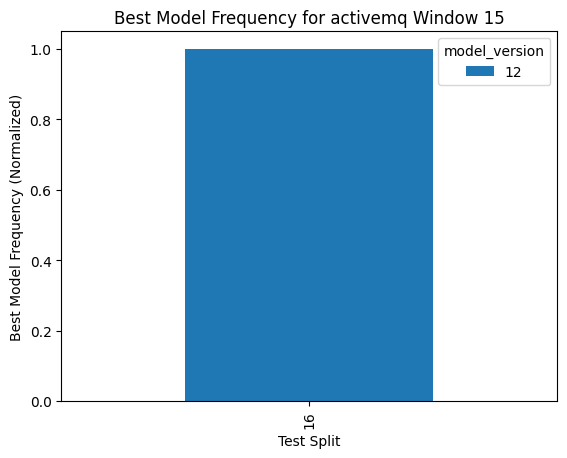

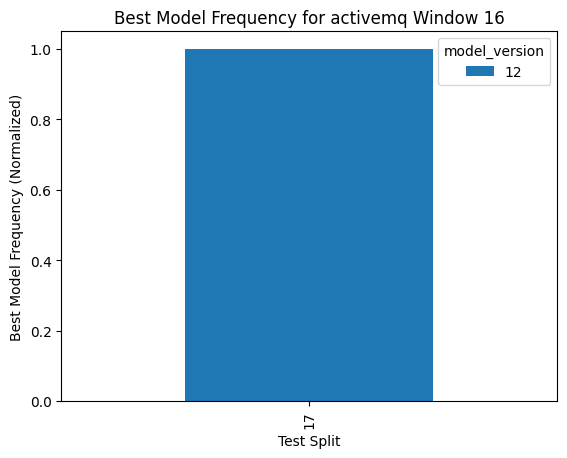

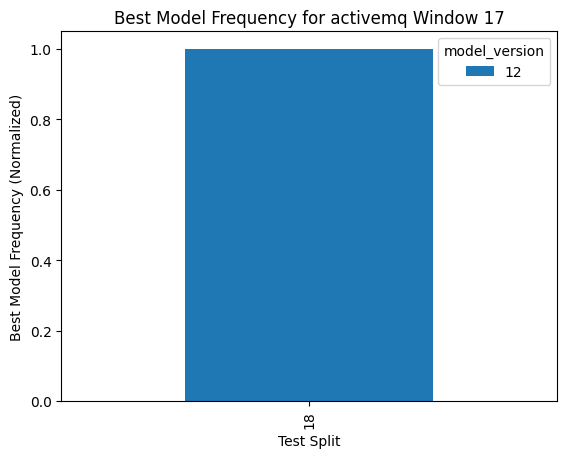

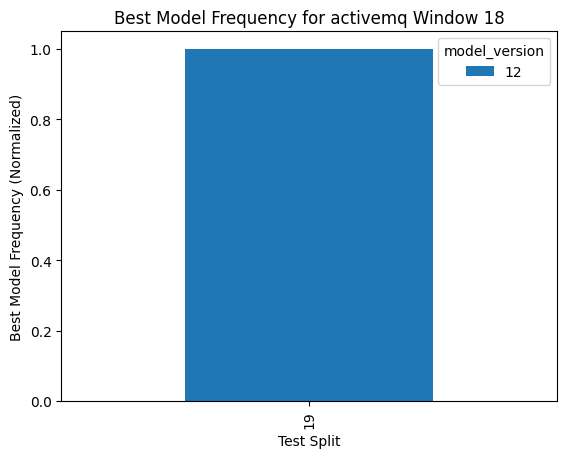

In [13]:
for i in range(MODEL_HISTORY,TOTAL_WINDOWS - 1):
    temp_bestmodel_df = bestmodel_df[bestmodel_df["window"] == i]
    temp_bestmodel_df = temp_bestmodel_df[temp_bestmodel_df["test_split"] == i + 1]

    # best model
    model_frequency_by_test_split = temp_bestmodel_df.groupby('test_split')['model_version'].value_counts().unstack().fillna(0)
    normalized_model_frequency_by_test_split = model_frequency_by_test_split.div(model_frequency_by_test_split.sum(axis=1), axis=0)
    p = normalized_model_frequency_by_test_split.plot(kind='bar', stacked=True)
    p.set_xlabel("Test Split")
    p.set_ylabel("Best Model Frequency (Normalized)")
    p.set_title(f"Best Model Frequency for {PROJECT_NAME} Window {i}")